In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [4]:
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
df[['petal length (cm)','petal width (cm)']]


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


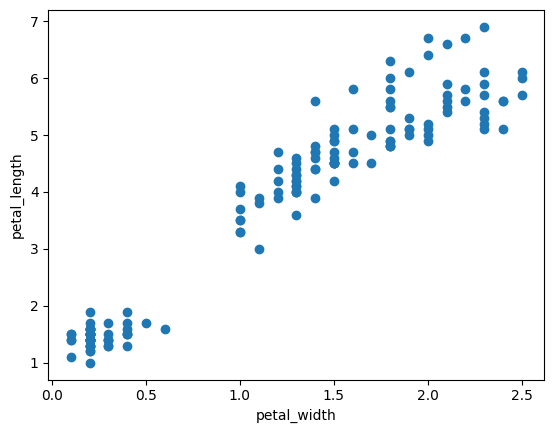

In [22]:
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])

In [90]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters=3)

In [92]:
cluster = kmeans.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [93]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

KeyError: "['sepal length (cm)', 'sepal width (cm)'] not found in axis"

In [94]:
df['cluster'] = cluster
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


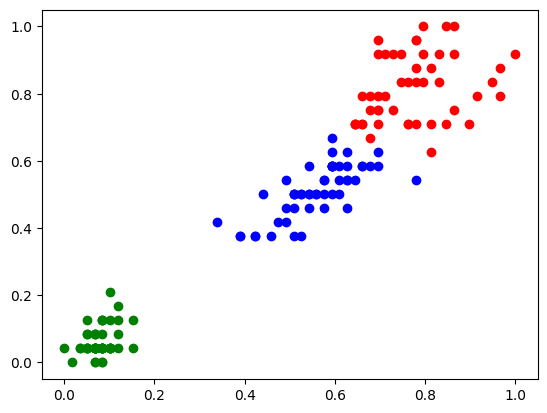

In [95]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster']==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="green")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="red")
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color="blue")

In [47]:
scaler = MinMaxScaler()
model=scaler.fit(df)
scaled_data=model.transform(df)
 

In [61]:
df = pd.DataFrame(scaled_data,columns=['petal length (cm)','petal width (cm)','cluster'])
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0.0
1,0.067797,0.041667,0.0
2,0.050847,0.041667,0.0
3,0.084746,0.041667,0.0
4,0.067797,0.041667,0.0
...,...,...,...
145,0.711864,0.916667,1.0
146,0.677966,0.750000,1.0
147,0.711864,0.791667,1.0
148,0.745763,0.916667,1.0


In [62]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0.0
1,0.067797,0.041667,0.0
2,0.050847,0.041667,0.0
3,0.084746,0.041667,0.0
4,0.067797,0.041667,0.0


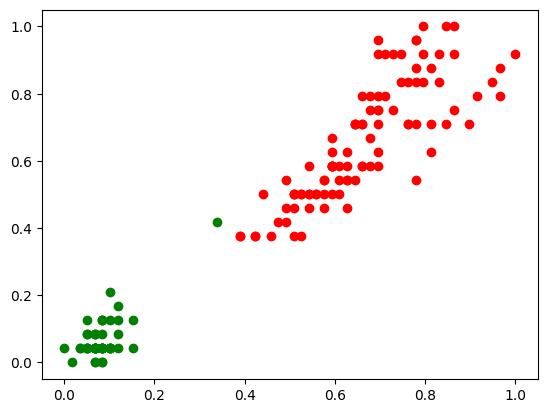

In [63]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="green")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="red")

In [72]:
sse = []
for i in range(1,10):
    model = KMeans(n_clusters = i)
    model.fit_predict(df[['petal width (cm)','petal length (cm)']])
    sse.append(model.inertia_)
    
    
    
    

In [73]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.8538617353912241,
 0.7400756601080583,
 0.6686150657728427,
 0.537654484827852,
 0.47079488984387124]

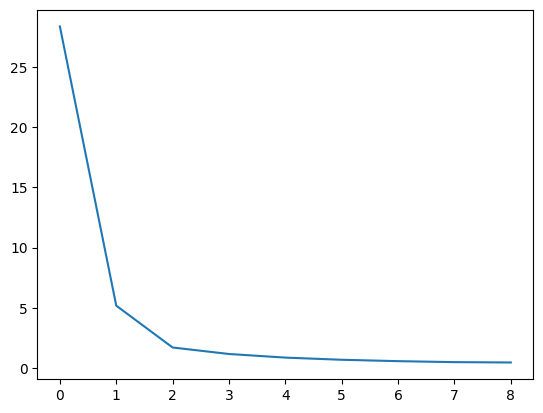

In [71]:
plt.plot(sse)